# Open Avenues: Medical Labeling

Taking in initial packages:

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

Importing the data given:

In [118]:
results_df = pd.read_csv('1345_customer_results.csv',
                         usecols = ['Case ID','Origin', 'Labeling State', 'Qualified Reads', 'Correct Label', 
                                    'Majority Label', 'Difficulty', 'Agreement', 'First Choice Answer', 'First Choice Votes', 
                                    'First Choice Weight', 'Second Choice Answer', 'Second Choice Votes', 'Second Choice Weight'],
                         index_col = 'Case ID')

reads_df = pd.read_csv('1345_admin_reads.csv',
                       usecols = ['topic_id', 'problem_id', 'user_id', 'read_id', 'labeling_state', 
                                  'score', 'accuracy', 'contest_id', 'content_id','chosen_answer', 
                                  'origin', 'origin_created_at', 'answerChoiceIds', 'response_submitted_at', 'problem_appeared_at'])

Extracting the expert's yes votes:

In [119]:
valid_vote = results_df["Origin"].str.fullmatch(r'(.*)vote[0-8](.*)', case=False)
results_df = results_df.loc[valid_vote]
results_df['Expert Yes Votes'] = results_df['Origin'].astype(str).str[-5].astype(int)
results_df

,Origin,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes
Case ID,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2
5888088,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0
5888089,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B13_time175617_medoid_vote0.jpg,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0
5888090,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B19_time62657_medoid_vote0.jpg,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0
5888091,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B12_time28993_medoid_vote4.jpg,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time69658_medoid_vote2.jpg,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2
5918376,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S93_time217256_member_vote3.jpg,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3
5918377,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time55376_member_vote4.jpg,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4


There is no longer a use for the 'Origin' column once we extracted the votes, so we can drop it now.

In [120]:
results_df = results_df.drop('Origin', axis = 1)

Here we label the expert's majority answers:
- If votes are greater than 4, we regard that as a yes.
- If votes are less than 4, we regard that as a no.
- If votes are exactly 4, we regarded that as undecided, and will fill those cells with a NaN.

In [121]:
results_df.loc[results_df['Expert Yes Votes'] > 4,'Expert Label'] = "'yes'"
results_df.loc[results_df['Expert Yes Votes'] < 4,'Expert Label'] = "'no'"
results_df.loc[results_df['Expert Yes Votes'] == 4,'Expert Label'] = "NaN"

In [122]:
results_df

,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes,Expert Label
Case ID,,,,,,,,,,,,,,
5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2,'no'
5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0,'no'
5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0,'no'
5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0,'no'
5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2,'no'
5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3,'no'
5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4,NaN


## Objective: Show that the crowd agrees with the expert majority more than experts agreeing with the expert majority

Firstly, we find the proportion of agreements upon each 'yes' or 'no' answer. Expert agreement on expert vote gives the proportion of expert voters who agree with the majority expert label:

In [123]:
for i in range(9):
    if i < 4:
        results_df.loc[results_df['Expert Yes Votes'] == i,"Expert Agreement on Expert Vote"] = (8-i)/8
    if i == 4:
        results_df.loc[results_df['Expert Yes Votes'] == i,"Expert Agreement on Expert Vote"] = 'NaN'
    else:
        results_df.loc[results_df['Expert Yes Votes'] == i,"Expert Agreement on Expert Vote"] = i/8

Now we find the proportion of the crowd's agreement on the correct vote:

In [124]:
results_df["Crowd Agreement on Correct Vote"] = 1 - results_df['Difficulty']

In [125]:
results_df

,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes Votes,Expert Label,Expert Agreement on Expert Vote,Crowd Agreement on Correct Vote
Case ID,,,,,,,,,,,,,,,,
5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,2,'no',0.25,1.000
5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,0,'no',0.0,1.000
5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,0,'no',0.0,1.000
5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,0,'no',0.0,1.000
5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,2,'no',0.25,0.000
5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,3,'no',0.375,0.333
5918377,In Progress,6,NaN,'yes',NaN,1.000,'yes',6,4.78,'no',0,0.00,4,NaN,NaN,NaN


Getting rid of when there are empty cells in the crowd's agreement on correct vote:

In [126]:
results_df_with_agreements = results_df.dropna(axis = 0, subset = 'Crowd Agreement on Correct Vote')

### Histogram displaying how often crowd agrees with the correct vote:

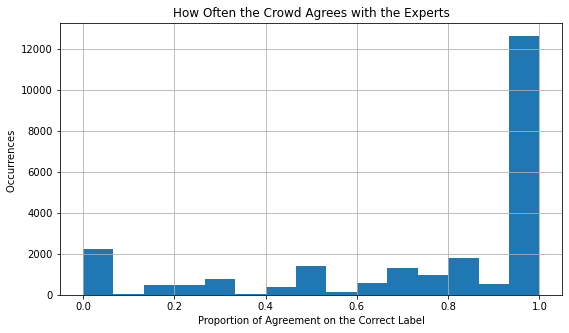

In [127]:
plt.figure(figsize = (9,5))
plt.hist(results_df_with_agreements['Crowd Agreement on Correct Vote'], bins = 15)
plt.xlabel("Proportion of Agreement on the Correct Label")
plt.ylabel("Occurrences ")
plt.title("How Often the Crowd Agrees with the Experts")
plt.grid()
plt.show()

- From the graph we can see that a majority of the time, the crowd agrees with the correct votes.

### Consider when experts have a low agreement. What is the agreement of the crowd in this situation?

In [128]:
low_expert_agreement = results_df_with_agreements[results_df_with_agreements["Expert Yes Votes"].isin([3,5])]

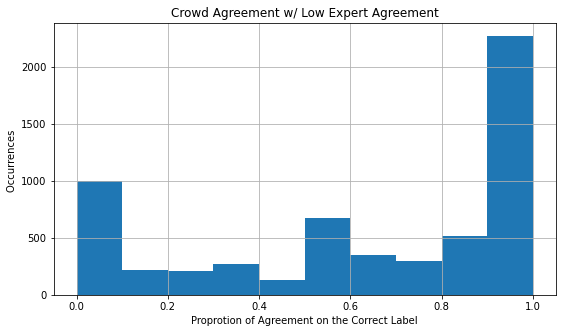

In [129]:
plt.figure(figsize = (9,5))
plt.hist(low_expert_agreement['Crowd Agreement on Correct Vote'])
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences ')
plt.title('Crowd Agreement w/ Low Expert Agreement')
plt.grid()
plt.show()

### Let's also consider when they have a unanimous agreement. How does the crowd's agreement look?

In [130]:
high_expert_agreement = results_df_with_agreements[results_df_with_agreements["Expert Yes Votes"].isin([0,8])]

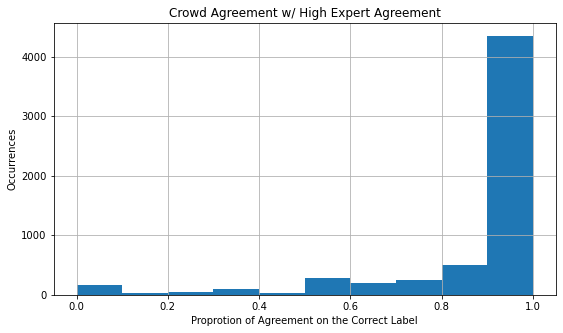

In [131]:
plt.figure(figsize = (9,5))
plt.hist(high_expert_agreement['Crowd Agreement on Correct Vote'])
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences')
plt.title('Crowd Agreement w/ High Expert Agreement')
plt.grid()
plt.show()

### Now comparing these two graphs together:

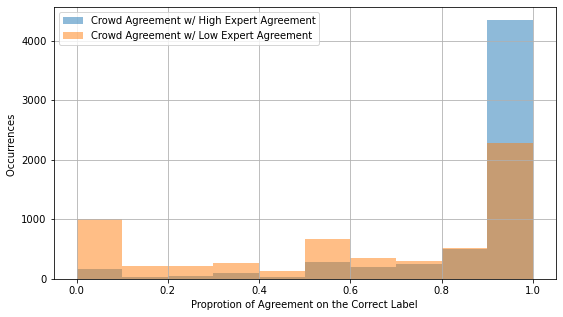

In [132]:
plt.figure(figsize = (9,5))
plt.hist(high_expert_agreement['Crowd Agreement on Correct Vote'], alpha=0.5, label='Crowd Agreement w/ High Expert Agreement')
plt.hist(low_expert_agreement['Crowd Agreement on Correct Vote'], alpha=0.5, label='Crowd Agreement w/ Low Expert Agreement')
plt.legend(loc='upper left')
plt.xlabel('Proprotion of Agreement on the Correct Label')
plt.ylabel('Occurrences ')
plt.grid()
plt.show()

- Where there is high expert agreement (all 8 experts voting yes / all 8 expert voting no), the majority has a high unanimous agreement rate on the correct label too.
- When experts have a low agreement amongst one another, the crowd reflects this as well. The crowds answers are much more spread out when the experts also cannot come to a unanimous decision.